# Introduction

For our project we wanted to use a direct approach, we wanted to have a clear answer and for that reason we looked into data sets that had decisive information that we could take and apply to graphs or charts. We explored a lot of different alternitives, but one major one we might have done was the best neighborhood for street racing. We thought that could be cool, we would look into the lengths of streets and such. Ultimately we deicded on the best neighborhood to become a athlete in. This was because we could use numbers to prove this. We looked into how many sports facilites each neighborhood has and based on that we know there is more access to become better as a player. Also this  gives the player more options to find the one they like the most.


# The Metric Explanation(Courts and Rinks)
#### Jake D'Ambola

For my metric I looked into the number of courts and rinks at any athletes disposal. Rinks included ice rinks, roller rinks and even street hockey rinks. The courts included many different types ranging from Basketball courts to Pickle ball courts. I did not want exclude any because I just wanted to see where the best place to be athletic in general would be, I wanted every possible data information I could get. So I am measuring the amount of courts and rinks in each Pittsburgh neighborhood. I only had to use one dataset since it included both courts and rink locations along with other details.



## Courts and Rinks Data

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas


In [5]:
df = pd.read_csv("hood/courts_and_rinks.csv")#reading in the dataset


df.head(5)#displaying 5 rows
#Just to show the different types of courts I used

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


Above I am just showing the variation in types of courts, I want to include every type of court. We don't have a standard for being athletic so every court/rink should count towards making that particular neighborhood a better fit for athletes.

Text(0.5, 1.0, 'Courts and Rinks')

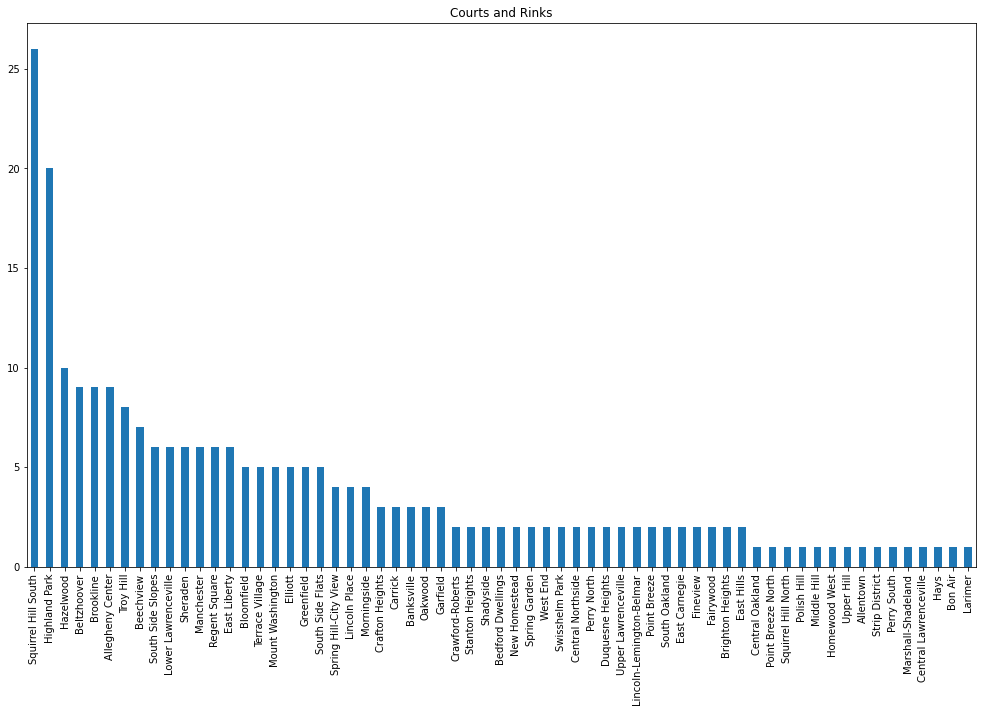

In [6]:
neighborhood = df ["neighborhood"].value_counts() #naming data to neighborhood
plt.figure(figsize=(17,10)) #sizing
neighborhood.plot(kind='bar') #bar graph
plt.title("Courts and Rinks") #title

Now I am taking the data from every neighborhood and displaying clearly how many courts and rinks each neighborhood has. I used this chart since it is a good way to show what the top neighborhoods are. Squirrel Hill South, Highland Park and Hazelwood are the top three. This bar graph is great for showing data from each neighborhood.

In [7]:
neighborhoods = geopandas.read_file("hood/Neighborhoods_.shp") 
courts_map =  neighborhoods.merge(df, how='left', left_on='hood', right_on='neighborhood')    #merging data so it can be put into map

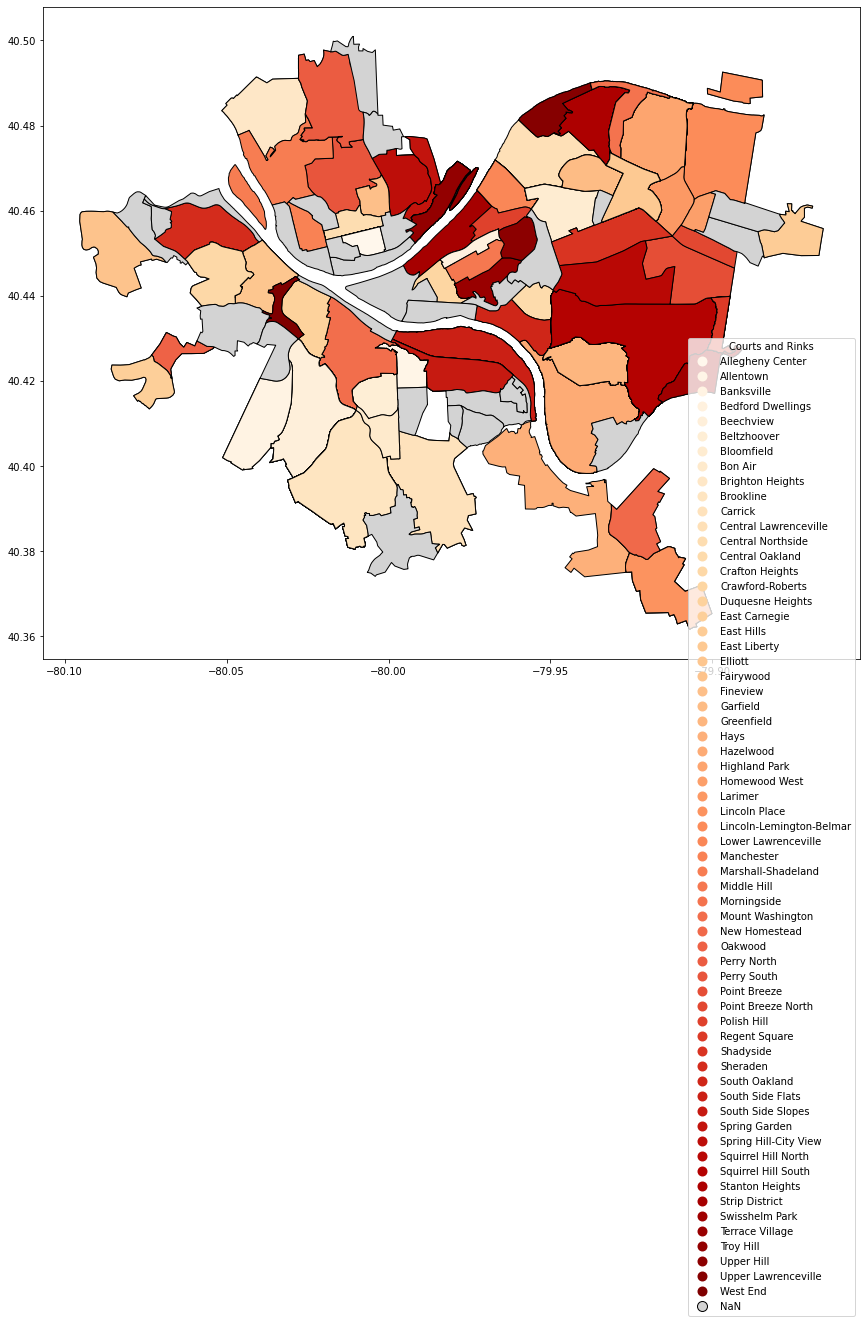

In [8]:
import matplotlib.pyplot as plt

ax = courts_map.plot(column='neighborhood', cmap='OrRd', edgecolor="black", legend=True, #plotting 'neighborhood' with data color orange and red with a legend
                     figsize=(15, 12), missing_kwds={"color": "lightgrey"})

# Add Legend
legend = ax.get_legend()
legend.set_title("Courts and Rinks")
legend.set_bbox_to_anchor((1, 0.5))  # Adjust the values to move the legend

# Show the plot
plt.show()

Here is a map of Pittsburgh and a legend with all of the neighborhoods that I am taking into consideration for most courts and rinks. I wanted to have every neighborhood listed just to show my slimming down process and how I am going to work through the given data to highlight only the important ones that have the most amount. There are many neighborhoods so I will begin to highlight the important ones and cut out the non important ones.

No handles with labels found to put in legend.


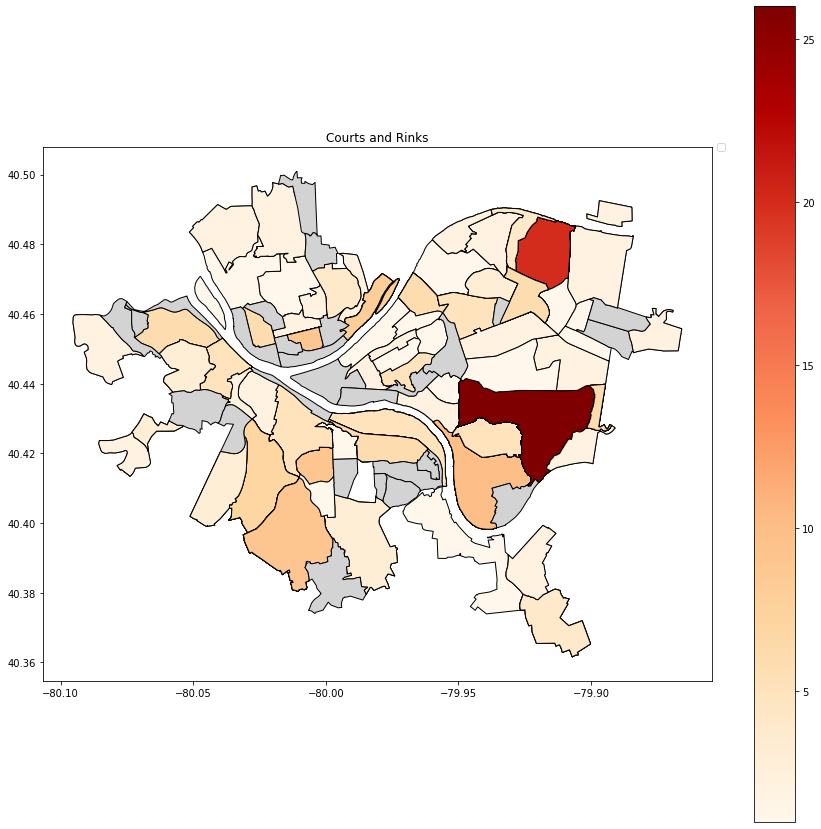

In [15]:
court_counts = courts_map.groupby('neighborhood').size().reset_index(name='court_count') #group courts map dataframe by neighborhood column in csv then count occurences of neighborhoods.

courts_map = pd.merge(courts_map, court_counts, on='neighborhood', how='left')  #merge calculated court counts back into original

ax = courts_map.plot(column='court_count', cmap='OrRd', edgecolor="black", legend=True,  #just plot now,
                     figsize=(15, 15), missing_kwds={"color": "lightgrey"})

legend = ax.legend(bbox_to_anchor=(1, 1), loc='center left')
plt.title('Courts and Rinks')
# Show the plot
plt.show()
#did not need any labels with legend, just needed the side bar

Now I have each neighborhood highlighted so we can clearly see which ones have the most. This heatmap does a great job for showing differeneces and where the majorty are. We now see which ones are the top, but we don't know their exact name so now we can use the bar graph of this data set below to see what each highlighted part is.

In [7]:
court_counts = courts_map.groupby('neighborhood').size().reset_index(name='court_count') #group courts map dataframe by neighborhood column in csv then count occurences of neighborhoods.

total_counts = court_counts.groupby('neighborhood')['court_count'].sum().reset_index(name='total_count') #group the court counts data frame by the neighborhood column and sum it

top_five_neighborhoods = total_counts.nlargest(10, 'total_count')#print the top 10 largest


print("Top Five Neighborhoods with the Highest Total Court Counts:\n")
print(top_five_neighborhoods[['neighborhood', 'total_count']].to_string(index=False))

Top Five Neighborhoods with the Highest Total Court Counts:

       neighborhood  total_count
Squirrel Hill South           26
      Highland Park           20
          Hazelwood           10
   Allegheny Center            9
        Beltzhoover            9
          Brookline            9
          Troy Hill            8
          Beechview            7
       East Liberty            6
Lower Lawrenceville            6


Now we see even more clearly our top 10 neighborhoods for most courts and rinks in Pittsburgh.

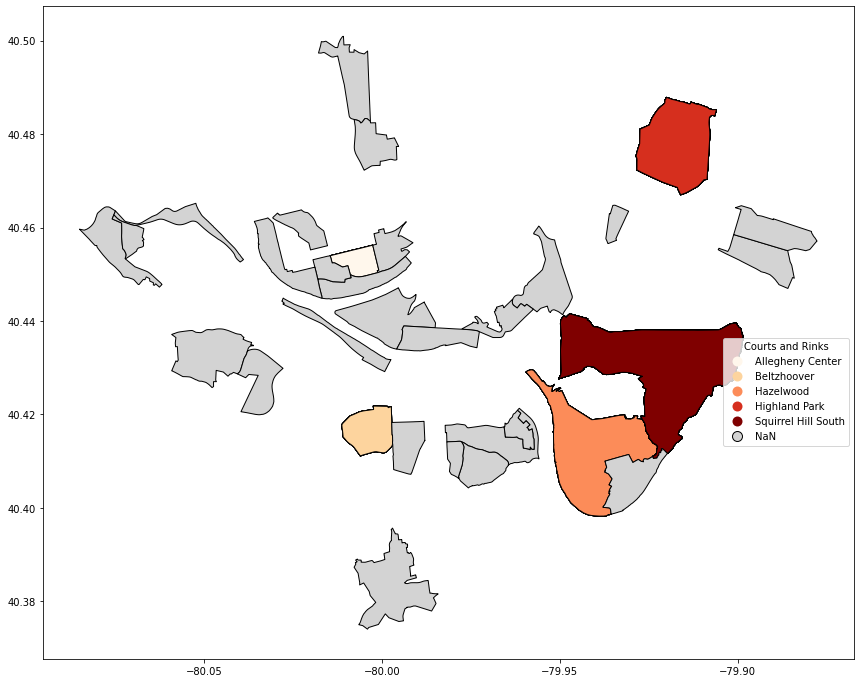

In [8]:
# List of neighborhoods to exclude
exclude_neighborhoods = ['Allentown', 'Banksville', 'Beechview','Bedford Dwellings','Bloomfield','Bon Air','Brighton Heights','Brookline','Carrick','Central Lawrenceville','Central Northside','Central Oakland','Crafton Heights','Crawford-Roberts','Duquesne Heights',
                        'East Carnegie','East Hills','East Liberty','Elliott','Fairywood','Fineview','Garfield','Greenfield','Hays','Homewood West','Larimer','Lincoln Place','Lincoln-Lemington-Belmar','Lower Lawrenceville','Manchester','Marshall-Shadeland','Middle Hill','Morningside','Mount Washington','New Homestead','Oakwood','Perry North','Perry South','Point Breeze','Point Breeze North','Polish Hill','Regent Square','Shadyside','Sheraden','South Oakland','South Side Flats','South Side Slopes','Spring Garden','Spring Hill-City View','Squirrel Hill North','Stanton Heights','Strip District','Swisshelm Park','Terrace Village','Troy Hill','Upper Hill','Upper Lawrenceville','West End','NaN']

# Filter the GeoDataFrame to exclude specified neighborhoods
filtered_courts_map = courts_map[~courts_map['neighborhood'].isin(exclude_neighborhoods)]

# Plot the filtered map
ax = filtered_courts_map.plot(column='neighborhood', cmap='OrRd', edgecolor="black", legend=True,
                              figsize=(15, 12), missing_kwds={"color": "lightgrey"})

# Add Legend
legend = ax.get_legend()
legend.set_title("Courts and Rinks")
legend.set_bbox_to_anchor((1, 0.5))  # Adjust the values to move the legend

# Show the plot
plt.show()

Finally, this is all of my data in one spot plotted out. We can see the top five areas we are focusing on and we can see each name. We can now fully tell that Squirrel Hill South is the best spot(for courts and rinks) to become a athlete in. Looking back on all the graphs we can tell that Squirrel Hill South beats out Highland Park by six so the top two are very good options.

# Pools
#### Sebastian Castro

For my metric I looked into the number of pools located in each neighborhood. In addition to this, I also looked at how big each of these pools were. The CSV file also included Spray Parks. Although it may be nice to live near a spray park, most athletes will not be using them so I decided to exclude them. I only had to use one data set because it had all of the information that I needed

## Pool Data

In [26]:
# loads data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


data = pd.read_csv('hood/pool.csv')

neighborhoods = gpd.read_file('hood/Neighborhoods_.shp') 
# neighborhoods.plot()

The code above loads all of the libaries and necessary files. The code below orders the csv file, and plots the number of pools per neighborhood

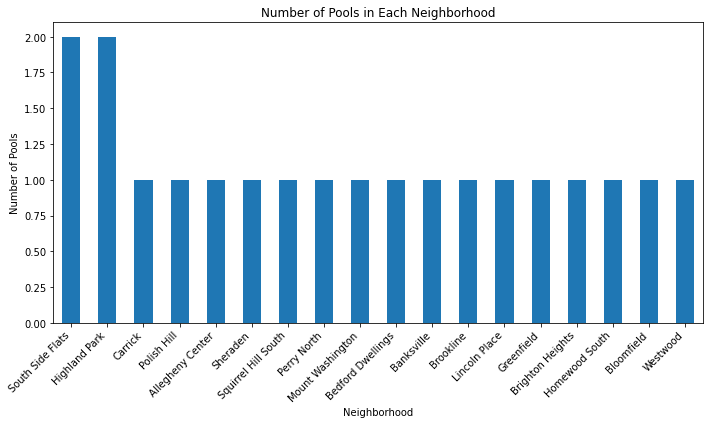

In [27]:
pools_data = data[data['type'] == 'Pool']
pool_counts = pools_data['neighborhood'].value_counts()

# Plotting the datadjdj
plt.figure(figsize=(10, 6))
pool_counts.plot(kind='bar')

plt.title('Number of Pools in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Pools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above is a bar graph showing the number of pools by neighboorhood. I choose this graph because I think it is a good way to visualize how many pools each neighborhood has. According to the data, most neighborhoods don't have any pools, which is why only a few are present. All of the neighborhoods above have one pool except for South Side Flats and Highland Park, which have 2 each.

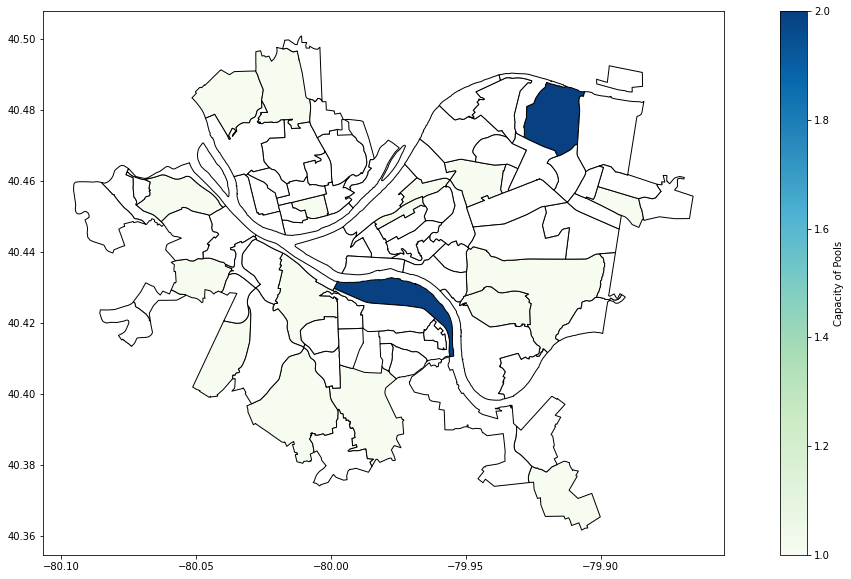

In [28]:
pools_data = data[data['type'] == 'Pool']
pool_counts = pools_data['neighborhood'].value_counts()

pool_counts = pool_counts.reset_index()
pool_counts.columns = ['neighborhood', 'count']

pool_counts['neighborhood'] = pool_counts['neighborhood'].astype(str)
neighborhoods['hood'] = neighborhoods['hood'].astype(str)
pool_counts_map = neighborhoods.merge(pool_counts, how='left', left_on='hood', right_on='neighborhood')
pool_counts_map.plot(column='count', 
               cmap='GnBu',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Capacity of Pools"}, 
               figsize=(20, 10),        
               missing_kwds={"color": "white"} 
               )

This is a map visualizing where every pool is located. The light green neighborhoods have one pool, the dark blue ones have two, and the white ones have zero

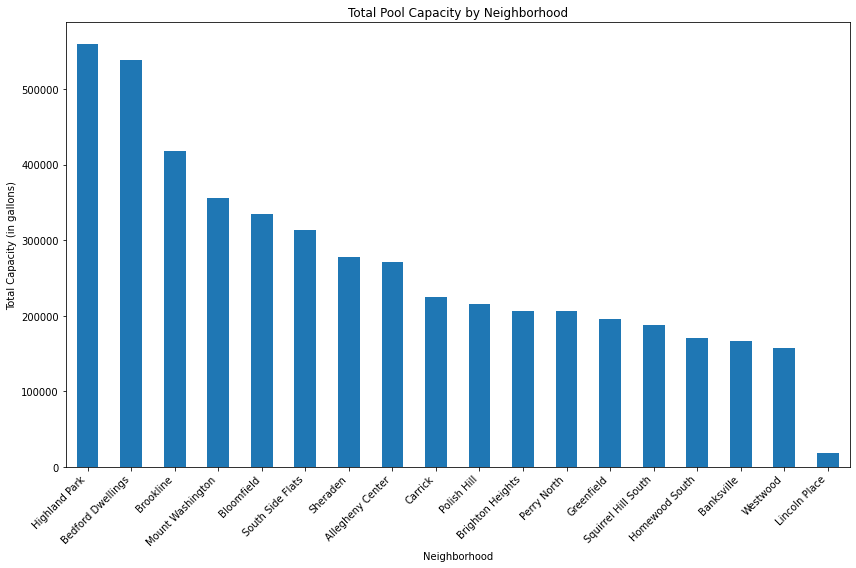

In [29]:
pools_data = data[data['type'] == 'Pool']

# Summarizing the pool capacities by neighborhood
pool_capacity_by_neighborhood = pools_data.groupby('neighborhood')['capacity'].sum()

# Sorting the result for better visualization
sorted_pool_capacity = pool_capacity_by_neighborhood.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sorted_pool_capacity.plot(kind='bar')
plt.title('Total Pool Capacity by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Capacity (in gallons)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

Above is a bar graph showing the capacity of every pool added together in every neighboorhood. This data shows that even though some neighborhoods only have one pool, it is a very big pool.

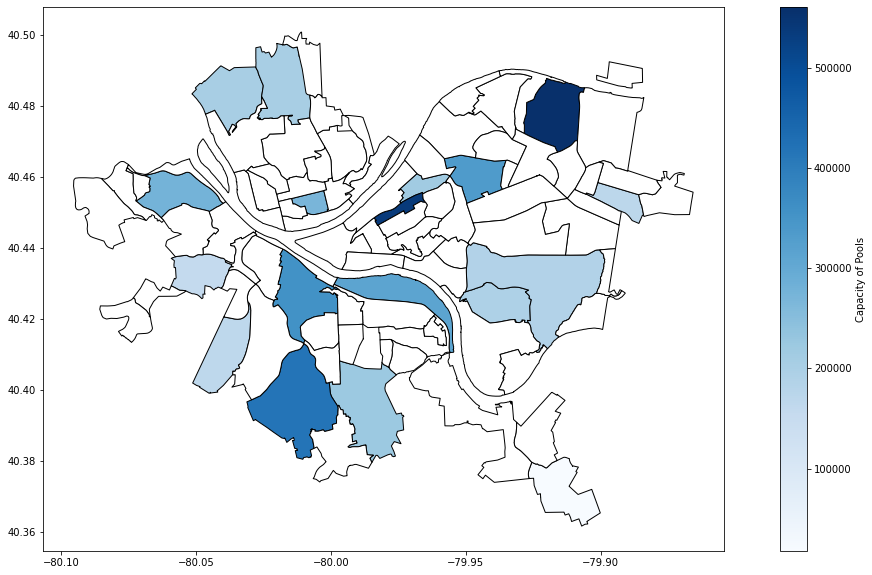

In [30]:
capacity_map = neighborhoods.merge(pool_capacity_by_neighborhood, how='left', left_on='hood', right_on='neighborhood')
capacity_map.plot(column='capacity', 
               cmap='Blues',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Capacity of Pools"}, 
               figsize=(20, 10),        
               missing_kwds={"color": "white"} 
               )

This map shows the total pool capacity per neighborhood, with the darker the color, the more water there is.
 
Highland Park is the best neighboorhood for pools, being tied for the most amount of pools and having the largest pool capacity.

# Fields


#### Kevin Ressler

For my metric I looked into the number of baseball fields in each neighborhood. Also, I looked at whether or not the fields had lights. I figured it was important to have many field options, but also for those fields to be available during dark hours

In [3]:
df = pd.read_csv("hood/BaseballFields.csv")
df.head(10)

,_id,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,2,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,3,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,4,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,5,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870
5,6,491692062,Bigbee,f,Emerald View Park - Bigbee Field Park,Rectangular Only,0,NaN,NaN,NaN,...,Allentown,3,18,42003180300,5,18,3,4-5,40.427849,-80.001223
6,7,332143201,Bill Stoltz,t,Arlington Park,Diamond Only,0,Skinned,210.0,250.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418624,-79.974959
7,8,800768920,Brighton Heights Field 1,f,Brighton Heights Park,Diamond Only,0,Skinned,170.0,170.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488582,-80.033072
8,9,742572488,Brighton Heights Field 2,f,Brighton Heights Park,Diamond Only,0,Skinned,260.0,375.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488152,-80.032783
9,10,183023484,Brighton Heights Field 3 - John Merry,f,Brighton Heights Park,Diamond Only,0,Skinned,310.0,333.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.487739,-80.032533


Here I am just importing the data and displaying the first 10 entries. This shows what kinds of data is recorded for each field like the name, neighborhood and size.

Text(0.5, 1.0, 'Number of Fields in each Neighborhood')

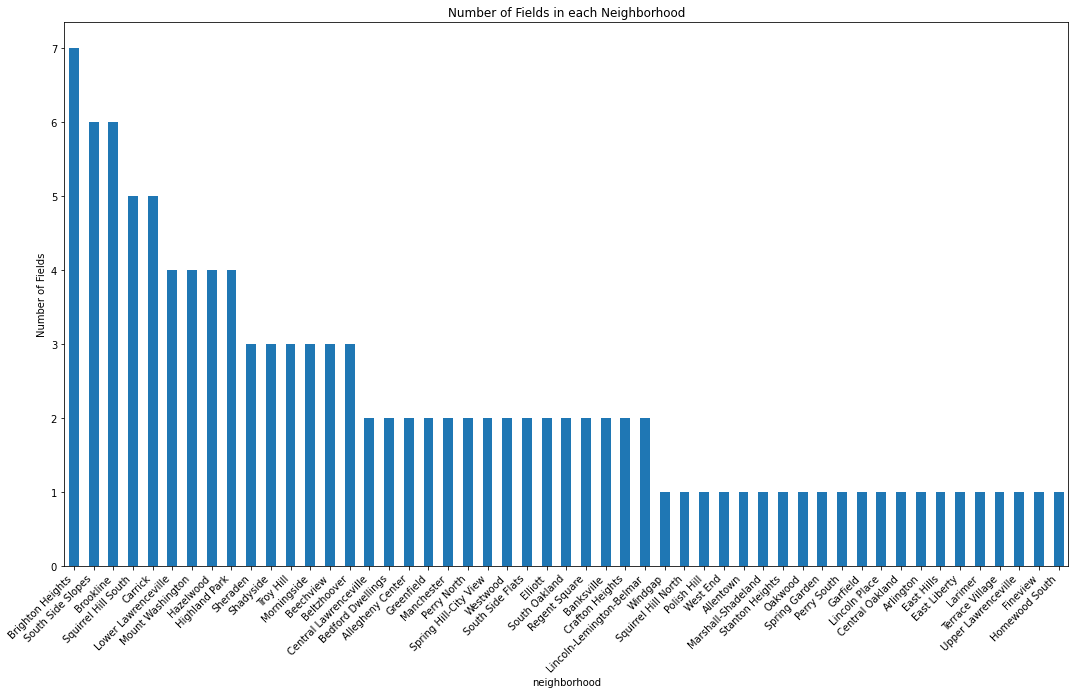

In [4]:
fields_count = df["neighborhood"].value_counts()
plt.figure(figsize=(18,10))
fields_count.plot(kind='bar')
plt.xlabel("neighborhood")
plt.ylabel("Number of Fields")
plt.xticks(rotation = 45, ha = "right")
plt.title("Number of Fields in each Neighborhood")

Here I show the number of fields per neighborhood in a bar graph. We can see that Brighton Heights has the most fields with seven.

Text(0.5, 1.0, 'Number of Fields with and without Lights')

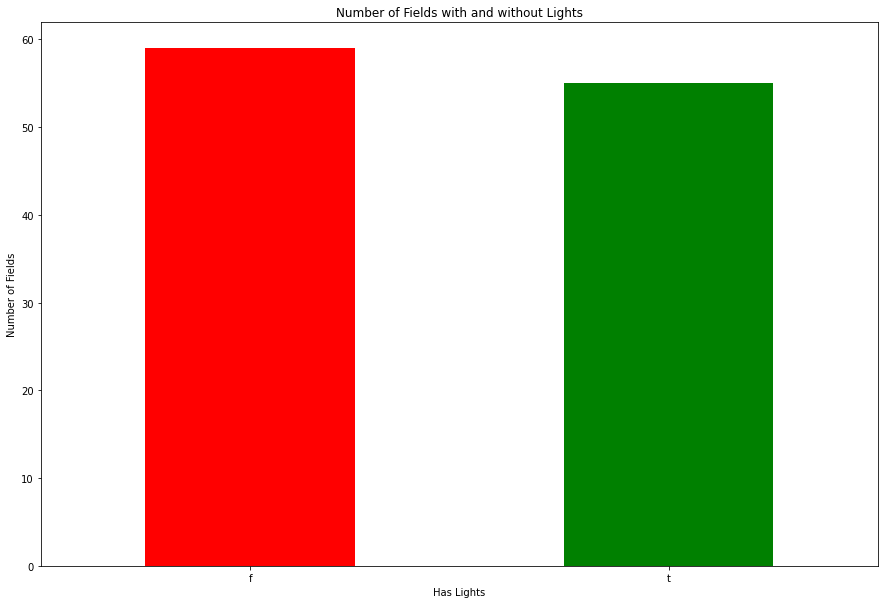

In [5]:
lights_counts = df['has_lights'].value_counts()
plt.figure(figsize=(15, 10))
lights_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel("Has Lights")
plt.ylabel("Number of Fields")
plt.xticks(rotation=0)
plt.title("Number of Fields with and without Lights")

This is a bar graph that shows the number of fields that do or do not have lights. The results are pretty much split between the two.

In [7]:
fields_count = df["neighborhood"].value_counts().reset_index()
fields_count.columns = ['neighborhood', 'fields_count']

lights_counts = df.groupby('neighborhood')['has_lights'].apply(lambda x: x.map({'t': 1, 'f': 0}).sum()).reset_index()
lights_counts.columns = ['neighborhood', 'fields_with_lights']

merged_df = pd.merge(fields_count, lights_counts, on='neighborhood', how='left')

merged_df['fields_with_lights'] = merged_df['fields_with_lights'].fillna(0).astype(int)

merged_df

,neighborhood,fields_count,fields_with_lights
0,Brighton Heights,7,0
1,South Side Slopes,6,4
2,Brookline,6,3
3,Squirrel Hill South,5,2
4,Carrick,5,3
5,Lower Lawrenceville,4,2
6,Mount Washington,4,4
7,Hazelwood,4,1
8,Highland Park,4,0
9,Sheraden,3,1


This is a dataframe that shows the field counts and how many of those fields have lights.

In [8]:
merged_df['sum_of_fields'] = merged_df['fields_count'] + merged_df['fields_with_lights']

merged_df.drop(['fields_count', 'fields_with_lights'], axis=1, inplace=True)

sorted_df = merged_df.sort_values(by='sum_of_fields', ascending=False)

sorted_df

,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


This is a dataframe that takes the sum of number of fields and fields with lights to get a value that gives 1 point for each field and another point if that field has lights.

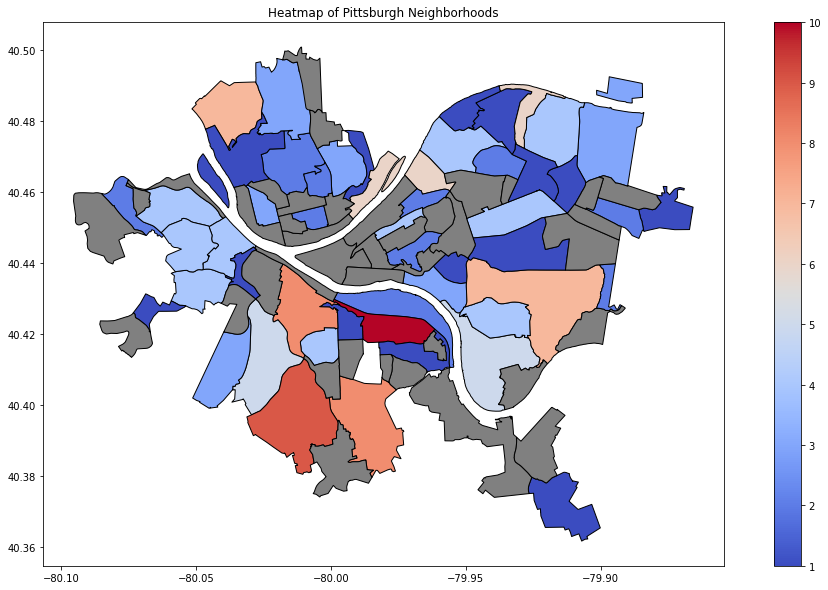

In [16]:
neighborhoods = geopandas.read_file("hood/Neighborhoods_.shp")

merged_geo_df = pd.merge(neighborhoods, sorted_df, left_on='hood', right_on='neighborhood', how='left')

fig, ax = plt.subplots(figsize=(18, 10))
merged_geo_df.plot(column='sum_of_fields', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='black', legend=True, missing_kwds={"color":"grey"})
plt.title('Heatmap of Pittsburgh Neighborhoods')

plt.show()

This is a heatmap that is more red for a higher sum value and more blue for a lower sum value. They grey neighborhoods are where there is no field data.

In [17]:
sorted_df.head(10)

,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


This shows the top ten neighborhoods from the heatmap. In conclusion, South Side Slopes is the best neighborhood for baseball fields.

# Final Conculsions

Based on the data above we can tell that the best neighborhood for courts and rinks is Squirrel Hill South. For pools the best neighborhood is Highland Park and for fields the best neighborhood is South Side Slopes. So since our data was scattered we had to find some commonalities. We began to see that the neighborhood Brookline ranked high for us. For courts and rinks it ranked in the top ten. For pools it shined when it came to pool capacity and had a average number of pools, so it was still competitive when compared to many other neighborhoods. When it comes to fields it ranked two for most amount of fields in a neighborhood. Also for Brookline half of the fields had lights making them a even better choice. So in conclusion ***Brookline*** is the ***overall*** best neighborhood.

Jake--My favorite neighborhood is Squirrel Hill South. This is because I play Ice Hockey so I always support neighborhoods that promote any types of rinks. Also I enjoy sports, so I would be home in Squirrel Hill South. It has the most amount of every sports facilities with so many different variations when it comes to how they look and the material used in them. When compared to Brookline Squirrel Hill South shines in sports I like to play, but Brookline has a better mix.

Sebastian - my personal favorite neighborhood is south side flats because even though it didn’t score well with the fields it scored decently for everything else. I'm also a good swimmer but I'm not good at most other sports. Because south side flats is one of the best ones for it's pools, and it's centrally located in Pittsburgh it's my favorite neighborhood.

Kevin- My personal favorite is West Oakland because as a Pitt student it has been all good experiences living here since August. West Oakland is different from the result from the data based on our data. I don't ever play baseball, hockey, or swim so this result doesn't impact my personal favorite. This project has shown me that I need to get out and see some other neighborhoods outside of Oakland.